In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
import mplfinance as mpf

In [3]:
from finta import TA
import work as wk


In [4]:
def map_strin_date(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

In [5]:
df_criado = pd.read_csv("saida_xrp.csv")
df_criado.head()

,date,fim,open,close,volume,high,low
0,2020-10-01 00:28:59,2020-10-01 00:33:59,1.36278,1.36278,8.000000,1.36278,1.36278
1,2020-10-01 00:43:59,2020-10-01 00:48:59,1.36361,1.36361,49.000000,1.36361,1.36361
2,2020-10-01 00:53:59,2020-10-01 00:58:59,1.36844,1.35750,4260.364038,1.36844,1.35750
3,2020-10-01 01:03:59,2020-10-01 01:08:59,1.36000,1.36000,2.000000,1.36000,1.36000
4,2020-10-01 01:08:59,2020-10-01 01:13:59,1.36000,1.36000,1.000000,1.36000,1.36000


In [6]:
df_criado["date"] = df_criado["date"].map(map_strin_date)

In [7]:
df_criado.set_index('date', inplace=True)
df_criado.head()

,fim,open,close,volume,high,low
date,,,,,,
2020-10-01 00:28:59,2020-10-01 00:33:59,1.36278,1.36278,8.000000,1.36278,1.36278
2020-10-01 00:43:59,2020-10-01 00:48:59,1.36361,1.36361,49.000000,1.36361,1.36361
2020-10-01 00:53:59,2020-10-01 00:58:59,1.36844,1.35750,4260.364038,1.36844,1.35750
2020-10-01 01:03:59,2020-10-01 01:08:59,1.36000,1.36000,2.000000,1.36000,1.36000
2020-10-01 01:08:59,2020-10-01 01:13:59,1.36000,1.36000,1.000000,1.36000,1.36000


In [8]:
# saida_30 = TA.EMA(df_criado, 30)
# saida_30.head()

# saida_100 = TA.EMA(df_criado, 100)
# saida_100.head()

# saida_300 = TA.EMA(df_criado, 400)
# saida_300.head()

# saida_1200 = TA.EMA(df_criado, 1200)
# saida_1200.head()

# saida_BB =  TA.BBANDS(df_criado)
# saida_1200.head() 

In [9]:
# df_criado["ema_1200"]

In [10]:
# passado

# df_criado["ema_1200"].shift(1)

In [11]:

# df_criado["ema_1200"]- df_criado["ema_1200"].shift(1) >0 # shift 1 leva um para frente

In [12]:
def calcula_r_compra_venda(df_criado):
    # presente > pasado compra
    r_libera_compra = df_criado["close"] > df_criado["ema_1200"].shift(1)
    r_libera_venda = ~ r_libera_compra
    r_liberado_operacao = r_libera_compra | r_libera_venda
#     r_libera_compra = df_criado["close"] > df_criado["ema_1200"]
#     r_determina_operaca_1 = df_criado["close"] - df_criado["ema_300"] >= 0

#     r_libera_venda = df_criado["close"] <= df_criado["ema_1200"]
#     r_determina_operaca_3 = df_criado["close"] - df_criado["ema_300"] <  0
#     r_liberado_operacao = True

#     r_libera_compra = r_determina_operaca & r_determina_operaca_1
#     r_libera_venda = r_determina_operaca_2 &   r_determina_operaca_3
#     r_liberado_operacao = ~(~ r_libera_compra & ~ r_libera_venda)
    
    
    
    return r_libera_compra, r_libera_venda, r_liberado_operacao

In [13]:
df_criado["ema_30"] =  TA.EMA(df_criado, 30)
df_criado["ema_100"] =  TA.EMA(df_criado, 100)
df_criado["ema_300"] =  TA.EMA(df_criado, 400)
df_criado["ema_1200"] =  TA.EMA(df_criado, 1200)
saida_BB =  TA.BBANDS(df_criado)
df_criado["BB_UPPER"] =  saida_BB["BB_UPPER"]
df_criado["BB_LOWER"] =  saida_BB["BB_LOWER"]
df_criado["normaliza"] = df_criado["close"] - df_criado["ema_1200"]
df_criado["r_compra"], df_criado["r_venda"], df_criado["libera_trade"] = calcula_r_compra_venda(df_criado)
df_criado.head()

,fim,open,close,volume,high,low,ema_30,ema_100,ema_300,ema_1200,BB_UPPER,BB_LOWER,normaliza,r_compra,r_venda,libera_trade
date,,,,,,,,,,,,,,,,
2020-10-01 00:28:59,2020-10-01 00:33:59,1.36278,1.36278,8.000000,1.36278,1.36278,1.362780,1.362780,1.362780,1.362780,NaN,NaN,0.000000,False,True,True
2020-10-01 00:43:59,2020-10-01 00:48:59,1.36361,1.36361,49.000000,1.36361,1.36361,1.363209,1.363199,1.363196,1.363195,NaN,NaN,0.000415,True,False,True
2020-10-01 00:53:59,2020-10-01 00:58:59,1.36844,1.35750,4260.364038,1.36844,1.35750,1.361178,1.361261,1.361288,1.361294,NaN,NaN,-0.003794,False,True,True
2020-10-01 01:03:59,2020-10-01 01:08:59,1.36000,1.36000,2.000000,1.36000,1.36000,1.360853,1.360936,1.360963,1.360969,NaN,NaN,-0.000969,False,True,True
2020-10-01 01:08:59,2020-10-01 01:13:59,1.36000,1.36000,1.000000,1.36000,1.36000,1.360659,1.360742,1.360769,1.360775,NaN,NaN,-0.000775,False,True,True


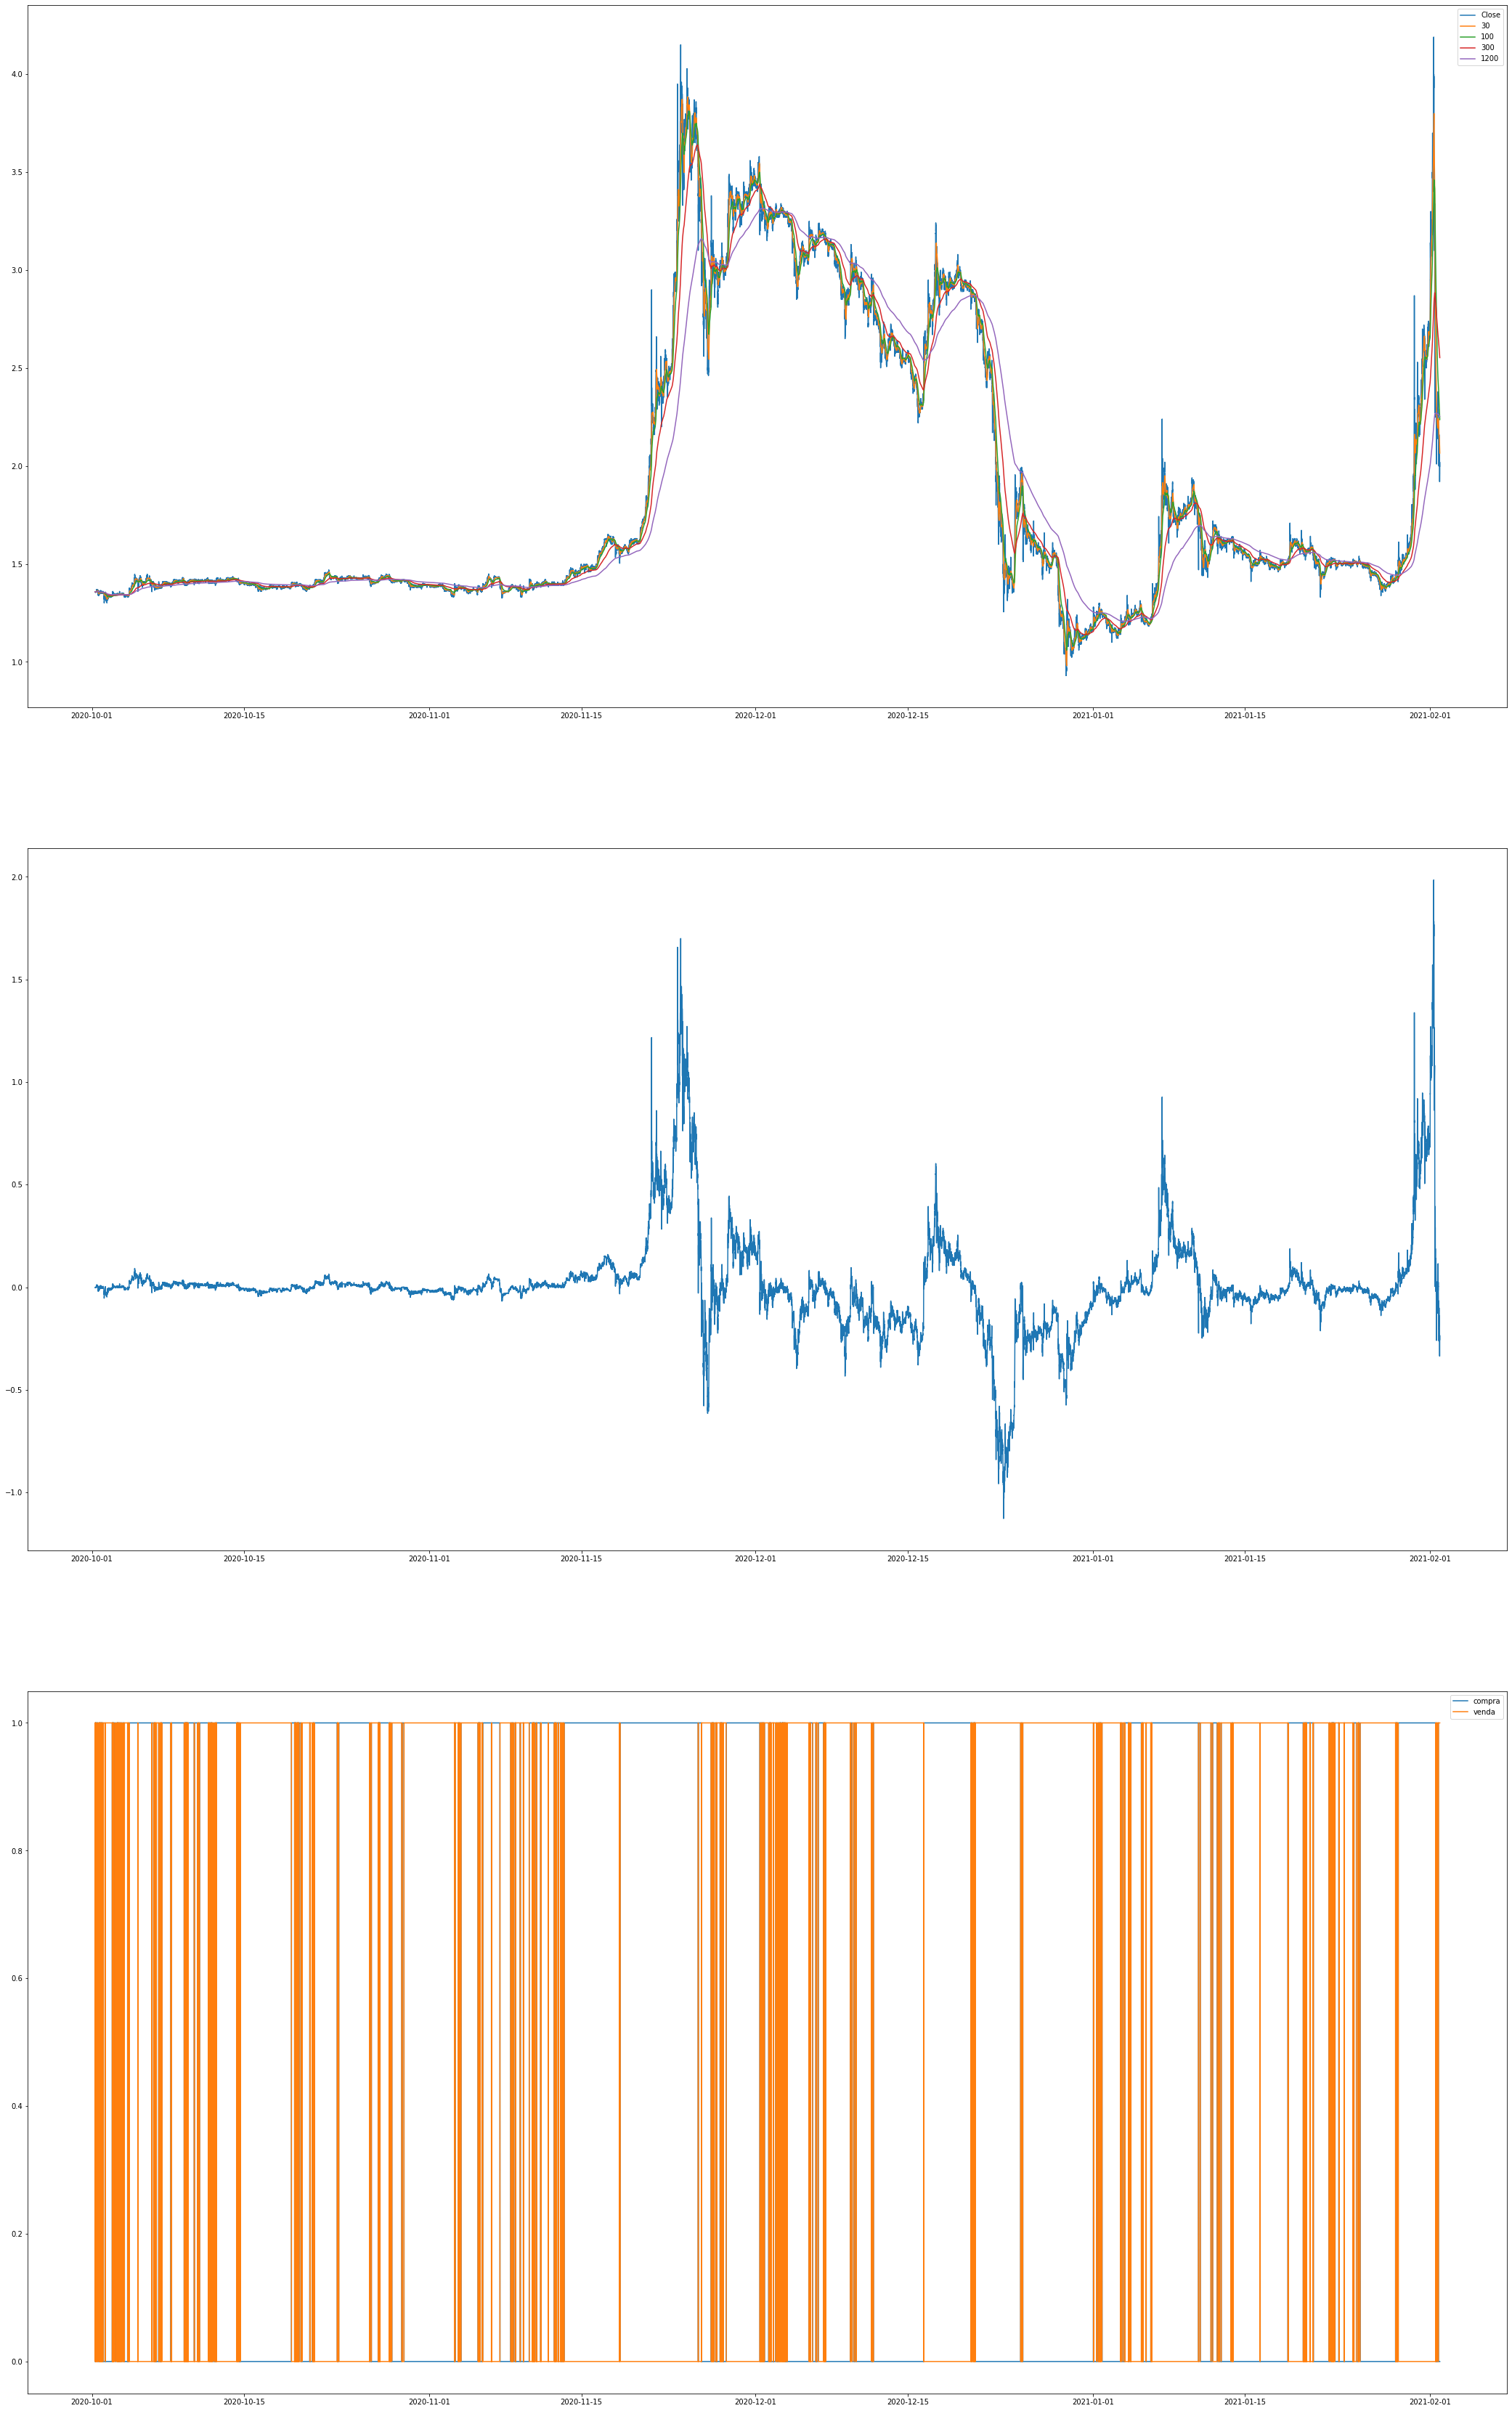

In [14]:
# quant = 100
# gap = 9000 + quant
inicio = 1
fim = 30000 + inicio


# df_bb_uper_n  = saida_BB["BB_UPPER"] 
# df_bb_lower_n = saida_BB["BB_LOWER"] 


fig, ax = plt.subplots(3,1)
fig.set_size_inches(36.5, 60.5)


ax[0].plot(df_criado["close"][-fim:-inicio],label='Close')
ax[0].plot(df_criado["ema_30"][-fim:-inicio],label='30')
ax[0].plot(df_criado["ema_100"][-fim:-inicio],label='100')
ax[0].plot(df_criado["ema_300"][-fim:-inicio],label='300')
ax[0].plot(df_criado["ema_1200"][-fim:-inicio],label='1200')
# ax[0].plot(df_bb_uper_n[-fim:-inicio], label ="boiler")
# ax[0].plot(df_bb_lower_n[-fim:-inicio], label ="boiler")

ax[0].legend()

ax[1].plot(df_criado["normaliza"][-fim:-inicio],label='dif_300')
ax[2].plot(df_criado["r_compra"][-fim:-inicio], label="compra")
ax[2].plot( df_criado["r_venda"][-fim:-inicio], label="venda")
# ax[2].plot(r_liberado_operacao[-fim:-inicio], label="indeciso")
ax[2].legend()
plt.savefig("oi.jpg")
plt.show()

In [15]:
# quando estiver em compra e liberado o objetivo é ficar com  90%- 10% da conta em btc e isso deve ocorrer no menor valor
# quando estiver em venda e liberado o objetivo é ficar com 10%-90% da conta em btc  e isso deve ocorrer no maior valor

#tem que vender acida do valor médio da compra

In [16]:
def gerador_dados(df_criado):
    for row in df_criado.iterrows():
        yield row
        
    

In [17]:
# 13000 a -13000
# 10%  a 90%

def create_p_variava(vari_menor,varia_maior):
    def saida_proporção_conta_compra(x_sai):
        pro = ( varia_maior - x_sai) * 80/(varia_maior - vari_menor) + 10 

        pro = pro/100

        r_saturo_positivo = pro > 0.9
        r_saturo_negativo = pro < 0.1
        if r_saturo_positivo:
            return 90/100
        if r_saturo_negativo:
            return 10/100
        return pro


#     def saida_proporção_conta_venda(x_sai):
#         pro = (x_sai + vari_menor) * (10 - 90)/(varia_maior - vari_menor) +10
#         pro = pro/100

#         r_saturo_positivo = pro > 0.9
#         r_saturo_negativo = pro < 0.1
#         if r_saturo_positivo:
#             return 90/100
#         if r_saturo_negativo:
#             return 10/100
#         return pro
    
    return saida_proporção_conta_compra #, saida_proporção_conta_venda
    


In [18]:
# saida_proporção_conta_compra(-13000)
# vari_menor = -0.1
# varia_maior = 1.5
p_compra= create_p_variava(-0.3, 1.5)
p_venda= create_p_variava(-1.5, 0.3 )

# p_compra= create_p_variava(varia_maior, vari_menor)
print("COMPRA ", p_compra(0), p_compra(+1.5), "BITCOIN")
print("VENDA ", p_venda(0), p_venda(-1.5), "BITCOIN")

COMPRA  0.7666666666666667 0.1 BITCOIN
VENDA  0.2333333333333333 0.9 BITCOIN


In [19]:
def estrategia(linha_tabela, vari_menor, varia_maior):
#     vari_menor = -40000
#     varia_maior = 40000
#     p_compra = create_p_variava(varia_maior, vari_menor)

    p_compra= create_p_variava(vari_menor, varia_maior)
    p_venda= create_p_variava(varia_maior, vari_menor )
    
    r_compra = linha_tabela["r_compra"]  
    r_venda = linha_tabela["r_venda"]
    r_libera = linha_tabela["libera_trade"]
    
    if r_libera:
        if r_compra:
            return 0, p_compra(linha_tabela["normaliza"])
        if r_venda:
            return 1, p_venda(linha_tabela["normaliza"])
    else:
        return -1, -1
            
        
#     get_media_300():

In [20]:
def scheduler(linha, grid):
    
    r_offset = linha["normaliza"] > 0.10
    r_gatilho_operacao = (linha["normaliza"] % grid >= 0) & (linha["normaliza"] % grid <= 0.1)
    
    if r_gatilho_operacao and r_offset:
        return True
    else:
        return False
    
    
    
    

In [21]:
g1 = gerador_dados(df_criado)


In [22]:
next(g1)

(Timestamp('2020-10-01 00:28:59'),
 fim             2020-10-01 00:33:59
 open                        1.36278
 close                       1.36278
 volume                            8
 high                        1.36278
 low                         1.36278
 ema_30                      1.36278
 ema_100                     1.36278
 ema_300                     1.36278
 ema_1200                    1.36278
 BB_UPPER                        NaN
 BB_LOWER                        NaN
 normaliza                         0
 r_compra                      False
 r_venda                        True
 libera_trade                   True
 Name: 2020-10-01 00:28:59, dtype: object)

In [23]:
def map_operacoes(linha):
#     print("----------------------")
#     print(linha)
    r_compra = linha["operacao"] == 0
    r_venda = linha["operacao"] == 1
    r_c_or_venda = r_compra | r_venda
    r_schedule =  linha["scheduler"]
    r_decisao = r_c_or_venda & r_schedule
    if r_decisao:
        return 1
    else:
        return 0

# Calculan

In [24]:
g1 = gerador_dados(df_criado)

ls_operacao = []
ls_qnt_btc = []
ls_scheduler = []
vari_menor = -0.3
varia_maior = 1.5
tamanho_grid = 0.2

for saida in g1:
    ls_operacao.append(estrategia(saida[1],vari_menor, varia_maior )[0])
    ls_qnt_btc.append(estrategia(saida[1],vari_menor, varia_maior )[1])
    ls_scheduler.append(scheduler(saida[1],tamanho_grid))
    
df_criado["operacao"] = ls_operacao
df_criado["qnt_btc"] = ls_qnt_btc
df_criado["scheduler"] = ls_scheduler
df_criado["alguma_operacao"] = df_criado.apply(map_operacoes, axis=1)
df_criado.head()

,fim,open,close,volume,high,low,ema_30,ema_100,ema_300,ema_1200,BB_UPPER,BB_LOWER,normaliza,r_compra,r_venda,libera_trade,operacao,qnt_btc,scheduler,alguma_operacao
date,,,,,,,,,,,,,,,,,,,,
2020-10-01 00:28:59,2020-10-01 00:33:59,1.36278,1.36278,8.000000,1.36278,1.36278,1.362780,1.362780,1.362780,1.362780,NaN,NaN,0.000000,False,True,True,1,0.233333,False,0
2020-10-01 00:43:59,2020-10-01 00:48:59,1.36361,1.36361,49.000000,1.36361,1.36361,1.363209,1.363199,1.363196,1.363195,NaN,NaN,0.000415,True,False,True,0,0.766482,False,0
2020-10-01 00:53:59,2020-10-01 00:58:59,1.36844,1.35750,4260.364038,1.36844,1.35750,1.361178,1.361261,1.361288,1.361294,NaN,NaN,-0.003794,False,True,True,1,0.231647,False,0
2020-10-01 01:03:59,2020-10-01 01:08:59,1.36000,1.36000,2.000000,1.36000,1.36000,1.360853,1.360936,1.360963,1.360969,NaN,NaN,-0.000969,False,True,True,1,0.232902,False,0
2020-10-01 01:08:59,2020-10-01 01:13:59,1.36000,1.36000,1.000000,1.36000,1.36000,1.360659,1.360742,1.360769,1.360775,NaN,NaN,-0.000775,False,True,True,1,0.232989,False,0


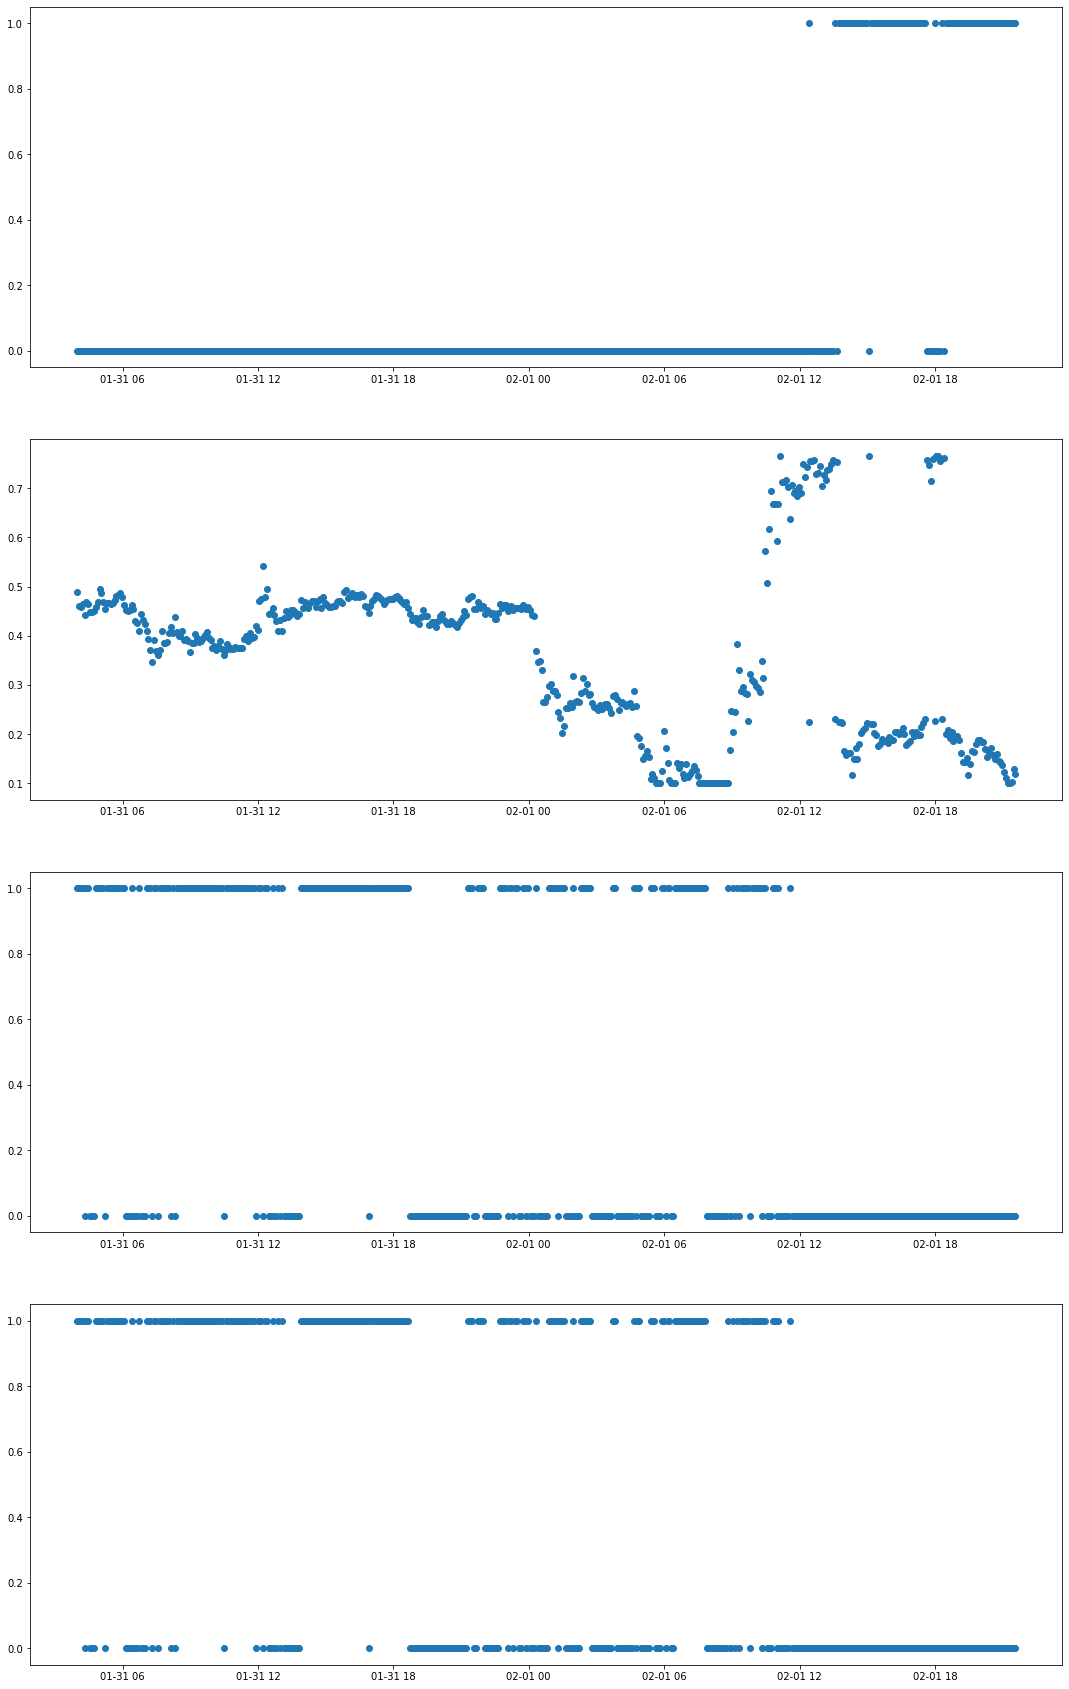

In [25]:
inicio = 1
fim = 500 + inicio

fig, ax = plt.subplots(4,1)
fig.set_size_inches(18.5, 30.5)

ax[0].scatter(df_criado.index[-fim:-inicio], df_criado["operacao"][-fim:-inicio])
ax[1].scatter(df_criado.index[-fim:-inicio], df_criado["qnt_btc"][-fim:-inicio])
ax[2].scatter(df_criado.index[-fim:-inicio], df_criado["scheduler"][-fim:-inicio])
ax[3].scatter(df_criado.index[-fim:-inicio], df_criado["alguma_operacao"][-fim:-inicio])

In [26]:
# class Mercador():
#     def __init__(self, qnt_dinheiro):
#         self.qnt_dinherio_inicial = qnt_dinheiro
#         self.qnt_dinherio_atual = qnt_dinheiro
#         self.btc_atual = 0
#         self.ls_valor_carteira = []
    
#     def _operacao_compra(self, por_para_ajustar, v_negociacao):
#         btc_compra = (self.qnt_dinherio_atual * por_para_ajustar) / v_negociacao
#         self.btc_atual = self.btc_atual + btc_compra
#         self.qnt_dinherio_atual = self.qnt_dinherio_atual * por_para_ajustar
#         self.ls_valor_carteira.append(self.qnt_dinherio_atual + self.btc_atual*v_negociacao )
    
    
#     def _operacao_venda(self, por_para_ajustar, v_negociacao):
#         btc_venda = self.btc_atual * por_para_ajustar
#         self.btc_atual = self.btc_atual - btc_venda
#         self.qnt_dinherio_atual = btc_venda* v_negociacao
    
#         self.ls_valor_carteira.append(self.qnt_dinherio_atual + self.btc_atual*v_negociacao )
    
#     def ajusta_portifolio_por(self, por_para_ajustar, v_negociacao):
#         def get_porcento_atual():
#             s = self.btc_atual * 100/(self.btc_atual + self.qnt_dinherio_atual) # so nao pode ser zero
#             return s 
        
#         r_oper_compra = por_para_ajustar >= get_porcento_atual()
#         r_oper_venda = por_para_ajustar < get_porcento_atual()
#         if r_oper_compra:
#             self._operacao_compra(por_para_ajustar - get_porcento_atual(), v_negociacao)
#         if r_oper_venda:
#             self._operacao_venda(get_porcento_atual() - por_para_ajustar, v_negociacao)
            
# #         print(get_porcento_atual())
        
        
        
        
        

In [27]:
m1 = wk.Mercador_back_teste(100)
df_criado.head()

,fim,open,close,volume,high,low,ema_30,ema_100,ema_300,ema_1200,BB_UPPER,BB_LOWER,normaliza,r_compra,r_venda,libera_trade,operacao,qnt_btc,scheduler,alguma_operacao
date,,,,,,,,,,,,,,,,,,,,
2020-10-01 00:28:59,2020-10-01 00:33:59,1.36278,1.36278,8.000000,1.36278,1.36278,1.362780,1.362780,1.362780,1.362780,NaN,NaN,0.000000,False,True,True,1,0.233333,False,0
2020-10-01 00:43:59,2020-10-01 00:48:59,1.36361,1.36361,49.000000,1.36361,1.36361,1.363209,1.363199,1.363196,1.363195,NaN,NaN,0.000415,True,False,True,0,0.766482,False,0
2020-10-01 00:53:59,2020-10-01 00:58:59,1.36844,1.35750,4260.364038,1.36844,1.35750,1.361178,1.361261,1.361288,1.361294,NaN,NaN,-0.003794,False,True,True,1,0.231647,False,0
2020-10-01 01:03:59,2020-10-01 01:08:59,1.36000,1.36000,2.000000,1.36000,1.36000,1.360853,1.360936,1.360963,1.360969,NaN,NaN,-0.000969,False,True,True,1,0.232902,False,0
2020-10-01 01:08:59,2020-10-01 01:13:59,1.36000,1.36000,1.000000,1.36000,1.36000,1.360659,1.360742,1.360769,1.360775,NaN,NaN,-0.000775,False,True,True,1,0.232989,False,0


In [28]:
g1 = gerador_dados(df_criado)
m1 = wk.Mercador_back_teste(100)
for saida in g1:
    porcentagem = saida[1]["qnt_btc"]
    r_compra = saida[1]["r_compra"]
    val_negociacao = saida[1]["close"]
    r_cheduler = saida[1]["alguma_operacao"] 
    index = saida[0]
    r_qnt = porcentagem > 0
    if r_cheduler:
#         if r_qnt:
#         m1.ajusta_portifolio_por(porcentagem, val_negociacao)
#     if r_qnt:
        m1.ajusta_portifolio_por(porcentagem, val_negociacao,index, r_compra)

In [29]:
def filtra_por(str_operaca):
    def filt_venda(x):
        s = x["busc_operacao"] == str_operaca
        return s
    return filt_venda
    
def map_tempo(x):
    return x["tempo"]
    

ls_vend= list(map(map_tempo, filter(filtra_por(False), m1.ls_dict)))
ls_comp = list(map(map_tempo, filter(filtra_por(True), m1.ls_dict)))


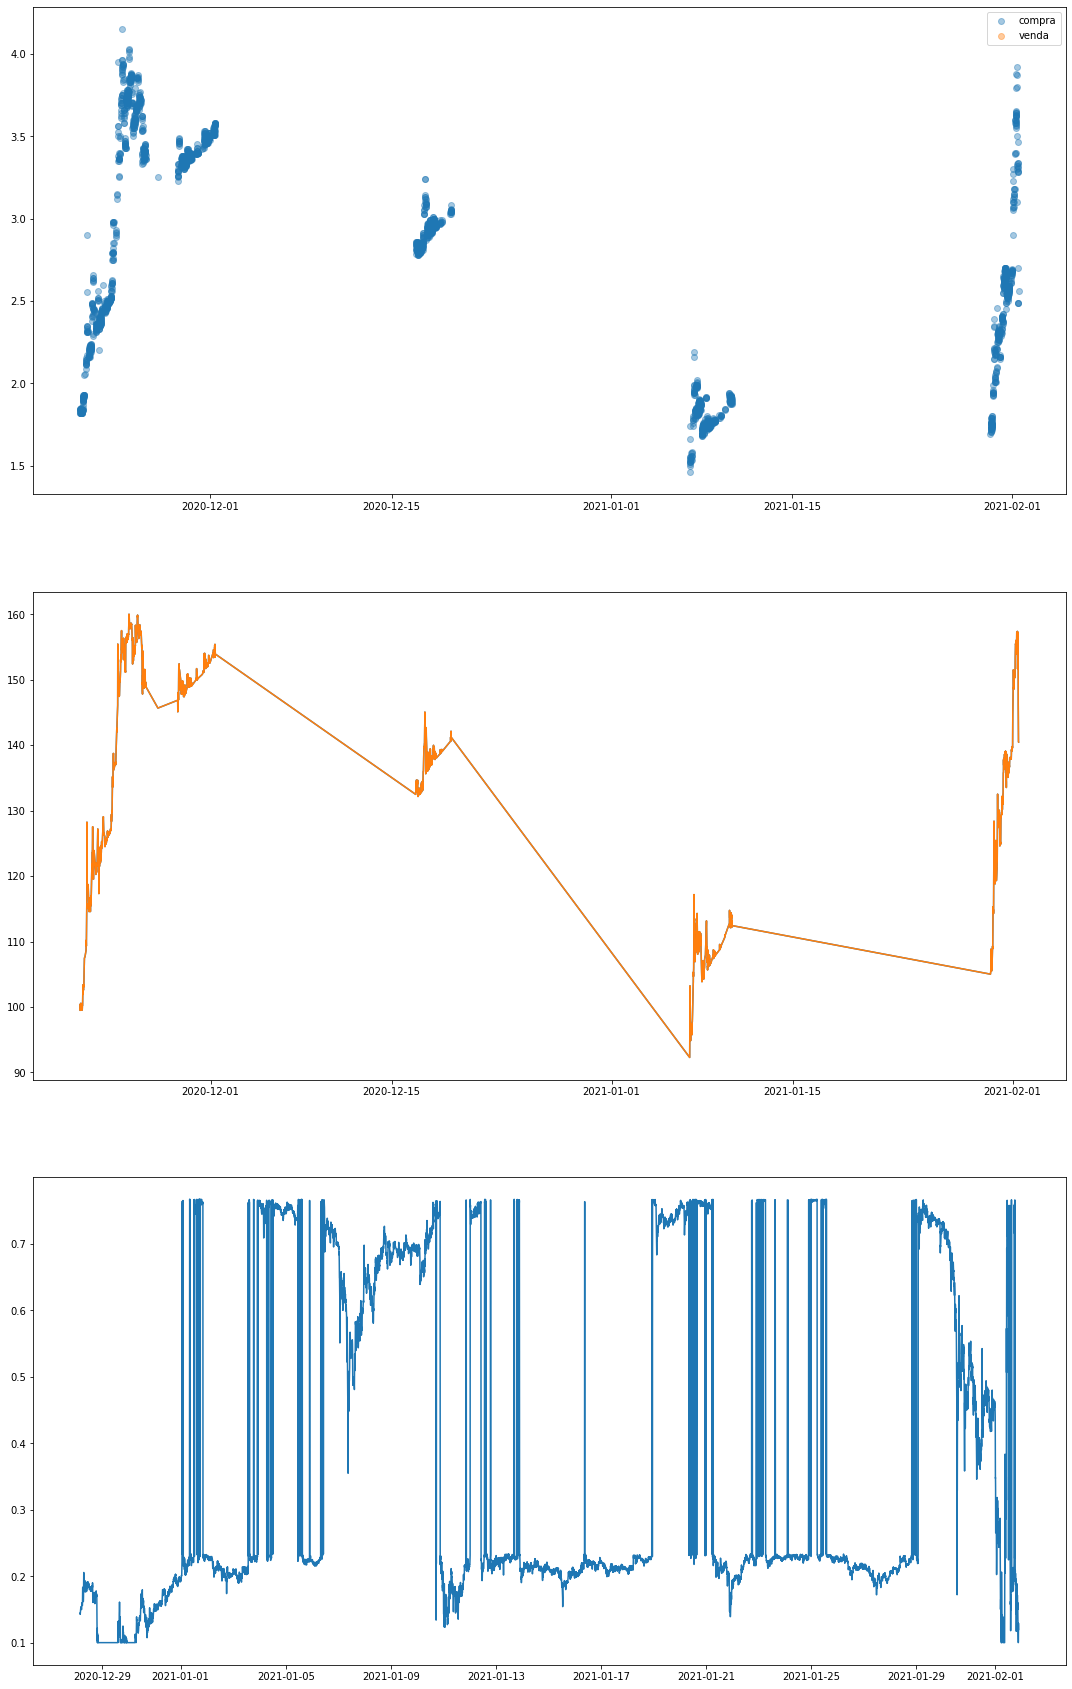

In [30]:
inicio = 1
fim = 10000 + inicio

fig, ax = plt.subplots(3,1)
fig.set_size_inches(18.5, 30.5)


# ax[0].plot(df_criado["close"][-fim:-inicio],label='Close')
# ax[0].plot(df_criado["ema_1200"][-fim:-inicio],label='1200')
ax[0].scatter(ls_comp, df_criado["close"].loc[ls_comp],label='compra', alpha=0.4)
ax[0].scatter(ls_vend, df_criado["close"].loc[ls_vend],label='venda', alpha=0.4)
ax[0].legend()

ax[1].plot(m1.ls_tempo[-fim:-inicio], m1.ls_valor_carteira[-fim:-inicio])


ax[1].plot(m1.ls_tempo[-fim:-inicio], m1.ls_valor_carteira[-fim:-inicio])


ax[2].plot(df_criado["qnt_btc"][-fim:-inicio])

In [31]:
# m1.ls_tipo[-10:]

In [32]:
# plt.plot(r_cheduler)
# print(r_cheduler)
# plt.plot(m1.ls_valor_carteira)

In [33]:
# btc = {"qnt_moeda": 1, "v_negociado":23423, "t_operaca": "buy!sell" }


# class Mercador():
#     def __init__(self, quantidade_inicial, estrategia):
#         self.quantidade_inicial = quantidade_inicial
#         self.quantidade_atual = quantidade_inicial
#         self.btc_comprados_atual = []
#         self.estrategia = estrategia
        
        
#     def novo_tick(self, linha_tabela):
#         estado, qnt_bitcoin_ideal = self.estrategia(linha_tabela)
        
#         r_compra = estado == 0
#         r_venda = estado == 1
#         r_incerto = estado == 2
        
#         if r_compra:
#             self._fazer_operacao_compra(qnt_bitcoin_ideal, linha_tabela["close"])
            
        
#         if r_venda:
#             self._fazer_operacao_compra(qnt_bitcoin_ideal, linha_tabela["close"])
            
#         print(self.btc_comprados_atual)
#         print(self.quantidade_atual)
        
#     def _get_quantidade(self):
#         def map_qnt_btc(x):
#             return x["qnt_moeda"]
        
#         ls_me_com = list(map(map_qnt_btc,self.btc_comprados_atual))
#         r_possui_valore = len(ls_me_com)
#         if r_possui_valore:
#             soma = pd.Series(ls_me_com).sum()
#             return soma
#         else:
#             return 0
    
    

#     def _get_preco_medio_por(self):
#         def map_qnt_btc(x):
#             return x["qnt_moeda"] * x["v_negociado"]
        
#         def get_porcento(soma_btc):
#             s = soma_btc * 100/(soma_btc - self.quantidade_atual) # so nao pode ser zero
#             return s 
        
#         ls_me_com = list(map(map_qnt_btc, self.btc_comprados_atual))
#         r_possui_valore = len(ls_me_com)
#         if r_possui_valore:
            
#             soma_btc = pd.Series(ls_me_com).sum()
#             soma_btc_p =  get_porcento(soma_btc)
#             return soma_btc_p
#         else:
#             return 0

#     def _get_fez_compra(self, preco):
#         def fil_compra(x):
#             r_fez_compra =  preco > x["v_negociado"]*1.02 and preco < x["v_negociado"]*-1.02
#             return r_fez_compra
        
#         r_ja_fez_uma_compra = len(list(filter(fil_compra, self.btc_comprados_atual))) != 0
#         return r_ja_fez_uma_compra
    
#     def _realizar_compra(self, qnt_compra, preco_tick):
#         qnt_compra_2 = qnt_compra/2
#         qnt_compra_brl  = self.quantidade_atual * qnt_compra_2
#         qnt_compra_pedida_moeda = preco_tick/qnt_compra_brl
        
#         self.quantidade_atual = self.quantidade_atual - qnt_compra_brl
        
        
#         self.btc_comprados_atual.append({"qnt_moeda": qnt_compra_pedida_moeda, 
#                                          "v_negociado":preco_tick,
#                                          "t_operaca": "buy" })
        
        
        
#     def _realizar_venda(self, qnt_venda, preco_tick):
#         def map_valores(x):
#             return preco_tick - x["v_negociado"] 
        
#         get_inde_maior = self.btc_comprados_atual.index(max(self.btc_comprados_atual))
#         operacao_aberta = self.btc_comprados_atual[get_inde_maior]
        
#         r_possui_qnt_vender = operacao_aberta["qnt_moeda"] > qnt_venda
#         if r_possui_qnt_vender:
#             self.quantidade_atual = self.quantidade_atual + qnt_venda * preco_tick
#             operacao_aberta["qnt_moeda"] = operacao_aberta["qnt_moeda"] - qnt_venda
            
#         else:
#             self.quantidade_atual = self.quantidade_atual + qnt_venda * preco_tick
#             self.btc_comprados_atual.pop(get_inde_maior)
#             print("_-------------------------------")
#             print(operacao_aberta)
        
    
    
#     def _fazer_operacao_compra(self, qnt_bitcoin_ideal, preco_tick ):
#         qnt_bitcoin_por = self._get_preco_medio_por()
        
#         r_comprar_mais = qnt_bitcoin_por < qnt_bitcoin_ideal
#         r_vender_mais = qnt_bitcoin_por >= qnt_bitcoin_ideal
       
#         if r_comprar_mais:
#             r_ja_fez_uma_compra = self._get_fez_compra(preco_tick)
#             if not r_ja_fez_uma_compra:
#                 self._realizar_compra(qnt_bitcoin_ideal - qnt_bitcoin_por, preco_tick)
                    
#         if r_vender_mais:
#             r_ja_fez_uma_compra = self._get_fez_compra(preco_tick)
#             if not r_ja_fez_uma_compra:
#                 self._realizar_venda(qnt_bitcoin_ideal - qnt_bitcoin_por,preco_tick)
        
        

In [34]:
# Testar uma estrategi

In [35]:
# def gerador_dados(df_criado):
#     for row in df_criado.iterrows():
#         yield row
        

In [36]:
# m1 = Mercador(200, estrategia)
# g1 = gerador_dados(df_criado)

In [37]:
# m1.novo_tick(next(g1)[1])

In [38]:
# next(g1)[1]


In [39]:
# saida_proporção_conta_venda(-13000)

In [40]:
# na caida mais dinheiro 80-20, total dinheiro mais btc * valor atual

# na subida mais bitcoin 20-80
# varia_bb = saida_BB["BB_UPPER"] - saida_300_passada
# saida_BB

In [41]:
# fig, ax = plt.subplots(1,1)
# fig.set_size_inches(18.5, 20.5)
# plt.plot(df_normalizada,label='dif_300')
# # plt.plot(saida_BB["BB_UPPER"] - saida_300_passada,label='BB')
# # plt.plot(saida_BB["BB_LOWER"] - saida_300_passada,label='BB')
# # plt.plot(varia_bb * 2, label='BB')

# plt.show()

In [42]:
# def cre_map(df_normalizada):
#     max_v = 10000
#     min_ = -10000
#     def c_map(x):
#         pass
# #     df_normalizada.max()
# #     df_normalizada.min()

In [43]:
# def filt_fun(x):
#     r_saida = (x > 0) & (x <1000)
#     return r_saida

# df_normalizada_filtered = df_normalizada.mask(filt_fun)
# # df_normalizada_filtered.dropna()
# df_normalizada_filtered

In [44]:
# df_normalizada_filtered

In [45]:
# inicio = 100
# fim = 10000 + inicio

# fig, ax = plt.subplots()
# fig.set_size_inches(18.5, 10.5)




# # saida_saida_30 = TA.EMA(df_sadida, 30)
# # saida_saida_30.head()

# plt.plot(df_sadida[-fim:-inicio],label='dif_300')
# # plt.plot(saida_saida_30[-fim:-inicio],label='dif_300_3')

In [46]:
# df_sadida

In [47]:
# df_normalizada_filtered.index.values[-fim:-inicio]

In [48]:
# df_ultimos_30 = df_criado
# df_ultimos_30

In [49]:
# def estrategia(df_ultimos_30):

#     df_ultimos_30["t_ema_100"]= TA.EMA(df_ultimos_30, 100)
#     df_ultimos_30["t_ema_30"]= TA.EMA(df_ultimos_30, 30)

#     r_vari_positiva = df_ultimos_30["t_ema_100"].iloc[-1] - df_ultimos_30["t_ema_100"].iloc[-2] >0

#     r_preco_bom = df_ultimos_30["t_ema_30"].iloc[-1] < df_ultimos_30["Close"].iloc[-1]

#     r_libera_compra = r_vari_positiva + r_preco_bom
    
# #     vl_saida = df_ultimos_30["t_ema_100"].iloc[-1]
#     deu_ruim = df_ultimos_30["t_ema_100"].iloc[-1]
#     return r_libera_compra, deu_ruim, df_ultimos_30["t_ema_100"].iloc[-1]


In [50]:
# def get_os_iniciais(quantidade):
#     return df_criado[-quantidade:]

In [51]:
# # def constori_gerador_dados(df_criado):
# def cria_gerador(df_criado):
#     for row in df_criado.iterrows():
#         yield row
            
# #     return gerador


In [52]:
# class Mercador():
#     def __init__(self, qnt_inicial):
#         self.quantidade = qnt_inicial
#         self.btc = 0
#         self.ls_negociado = []
        
        
#     def compra(self, negociacao, preco):
#         r_ja_comprado = self.btc > 0
#         if not r_ja_comprado:
#             self.quantidade = self.quantidade - negociacao
#             self.btc = negociacao/preco * 1# (1 - 0.70/100)
#             print("compro uma vez pelo ",preco," a quantidade de ",self.btc )
#             plt.plot(self.ls_negociado)
#             plt.show()
#         return r_ja_comprado
    
#     def venda(self, negociacao):
#         r_tem_pra_vender = self.btc > 0
#         if r_tem_pra_vender:
#             self.quantidade = self.quantidade + self.btc * negociacao * 1 #(1- 0.7/100)
            

#             self.ls_negociado.append(self.quantidade)
#             print("vendeu a quantidade de ",self.btc, " pelo valor de ", negociacao)
#             plt.plot(self.ls_negociado)
#             plt.show()
            
#             self.btc = 0
            
#         return r_tem_pra_vender

In [53]:
# def adicionand_ge(saida, df_ultimos_30 ):
#     dict_saida = {"Date":saida[0],
#                   "fim":saida[1]["fim"],
#                   "Open":saida[1]["Open"], 
#                   "Close":saida[1]["Close"], 
#                   "Volume":saida[1]["Volume"],
#                   "High":saida[1]["High"],
#                   "Low":saida[1]["Low"]} 
    
    
#     df_ultimos_30 =df_ultimos_30.drop(df_ultimos_30.index[0])
#     return df_ultimos_30.append(dict_saida, ignore_index=True)

In [54]:
# mercador = Mercador(100)
# df_ultimos_30 = get_os_iniciais(150)

# gera = cria_gerador(df_criado)

In [55]:

# i=0
# r_ja_comprado= False
# for saida in gera:
#         # for valor in gera:
#     #     print(saida[0])
#     # saida = next(gera)
#     df_ultimos_30 = adicionand_ge(saida, df_ultimos_30)

#     r_compra, v_liquida, v_lucro = estrategia(df_ultimos_30)

#     valor_atual = saida[1]["Close"]

    

#     if r_ja_comprado:
#         if valor_atual < v_liquida:
#             mercador.venda(valor_atual)

#         if valor_atual > v_lucro:
#             mercador.venda(valor_atual)
    
#     if r_compra:
#         r_ja_comprado = mercador.compra(10, valor_atual )
        

        
# print(valor_atual, r_compra, v_liquida, v_lucro )

In [56]:
# saida[1]

In [57]:
# saida[1]["Close"] > v_lucro

In [58]:
# type(saida)


In [59]:
# df_ultimos_30.iloc[-1]

In [60]:
# mpf.plot(df_criado[len(df_criado)-100:len(df_criado)],type='candle',volume=True)
# mpf.plot(saida)

In [61]:
# mpf.plot(df_criado,type='candle',volume=True)

In [62]:
# from finta import TA

In [63]:
# TA.SMA(df_criado, 42)

In [64]:
# TA.MACD(df_criado,12,26)

In [65]:
# ma = TA.MACD(df_criado,10,40)

In [66]:
# print(ma.head(100))

In [67]:
# TA.MOM(df_criado)

In [68]:
# TA.SMA(df_criado,10)

In [69]:
# TA.SMA(df_criado,20)

In [70]:
# TA.EMA(df_criado, 10)
# TA.EMA(df_criado, 30)

In [71]:
# TA.PIVOT_FIB(df_criado)

In [72]:
# r_comprar = r_cruzou_media_subindo + r_var_mac_positiva

In [73]:
# class Operacoes:
#     def __init__(self, qnt_compra_pedida_moeda,preco_tick, tipo ):
#         self.dic_operaca = {"qnt_moeda": qnt_compra_pedida_moeda, 
#                             "v_negociado":preco_tick,
#                             "t_operaca": tipo}
        
        

In [74]:
# https://github.com/peerchemist/finta